# **Mini-Project: Data Wrangling JSON Exercise**

## Import pandas, numpy and json packages

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
%matplotlib inline

## Laod the World Bank Projects json dataset

In [2]:
with open('data/world_bank_projects.json') as file:
    data = json.load(file)

In [3]:
print('datatype is ',type(data))
print('data has %s entries' %(len(data)))

datatype is  <class 'list'>
data has 500 entries


In [4]:
new_data = []
for entry in data:
    if 'borrower' not in list(entry.keys()):
        entry['borrower'] = ''
    new_data.append(entry)

Create a dataframe with country name and borrower information

In [5]:
borrower_df = json_normalize(new_data,'mjtheme_namecode',['countryname','countryshortname','borrower'])
borrower_df.head()
# 'code' and 'name' columns are not important, so lets drop them. Lets also drop duplicate rows
borrower_df.drop(['name','code'],axis=1,inplace = True)
borrower_df.drop_duplicates(inplace= True)
borrower_df.reset_index(drop=True,inplace=True)
borrower_df.head()

,countryname,countryshortname,borrower
0,Federal Democratic Republic of Ethiopia,Ethiopia,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,Republic of Tunisia,Tunisia,GOVERNMENT OF TUNISIA
2,Tuvalu,Tuvalu,MINISTRY OF FINANCE AND ECONOMIC DEVEL
3,Republic of Yemen,"Yemen, Republic of",MIN. OF PLANNING AND INT'L COOPERATION
4,Kingdom of Lesotho,Lesotho,MINISTRY OF FINANCE


Looks borrower is always the country itself or it's constitiuents.  
Lets see who were the borrowers for Africa.

In [14]:
borrower_df[borrower_df['countryname']=='Africa']

,countryname,countryshortname,borrower
44,Africa,Africa,ECOWAS
45,Africa,Africa,UGANDA-COMOROS
50,Africa,Africa,"OSS, IUCN, CILSS"
56,Africa,Africa,BANK EXECUTED
61,Africa,Africa,"BURUNDI,RWANDA,TANZANIA"
88,Africa,Africa,GOVERNMENT OF MALI
148,Africa,Africa,MINISTRIES OF TELECOM AND ICT
163,Africa,Africa,TANZANIA
223,Africa,Africa,"MALAWI, MOZAMBIQUE, ZAMBIA"
258,Africa,Africa,NILE BASIN INITIATIVE


Examining borrower information was useful. We found information for some of the African coutries like Uganda, Mali, Tanzania, and Niger. We also found that some of countries borrow as a group, such as the ECOWAS association; Burundi, Rwanda, Tanzania; Malawi, Mozambique, Zambia. 

There is, however, no consistency 

Lets create a boolean column 'country_in_borrower'. 

If short name of the country is included in the borrower's name, then that entry will get True, False otherwise.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 5 columns):
code                1499 non-null object
name                1377 non-null object
countrycode         1499 non-null object
countryname         1499 non-null object
countryshortname    1499 non-null object
dtypes: object(5)
memory usage: 58.6+ KB


In [24]:
df_noAfrica = df.loc[df.countryname!='Africa',:]

Republic of Indonesia              56
Republic of India                  51
Socialist Republic of Vietnam      43
People's Republic of Bangladesh    41
Federative Republic of Brazil      41
People's Republic of China         40
Republic of Yemen                  34
Kingdom of Morocco                 32
Republic of Mozambique             31
Nepal                              29
Name: countryname, dtype: int64


Text(0.5, 0, 'Country')

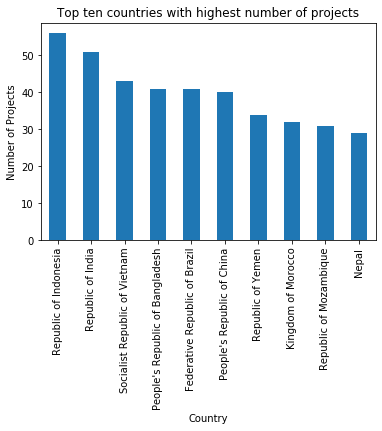

In [32]:
print(df_noAfrica.countryname.value_counts().head(10))
df_noAfrica.countryname.value_counts().head(10).plot('bar',title='Top ten countries with highest number of projects')
plt.ylabel('Number of Projects')
plt.xlabel('Country')

## **2. Top 10 major project themes**

In [35]:
print('Number of unique Major Project Themes: ',df.code.unique().size)

Number of unique Major Project Themes:  11


Text(0.5, 0, 'Theme Name Code')

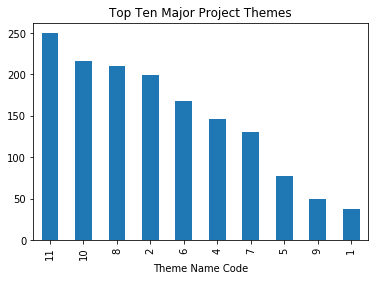

In [36]:
df['code'].value_counts()[:10].plot(kind = 'bar',title = 'Top Ten Major Project Themes')
plt.xlabel('Theme Name Code')

## **3. Create a dataframe with the missing names filled in.**

In [37]:
new_df = df.copy()

In [42]:
code_name_mapper = dict(df[df.name.notnull()][['code','name']].values)
code_name_mapper

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [39]:
new_df.loc[df.name.isnull(),'name'] = new_df.loc[df.name.isnull(),'code'].apply(lambda code: code_name_mapper[code])
new_df.head()

,code,name,countrycode,countryname,countryshortname
0,8,Human development,ET,Federal Democratic Republic of Ethiopia,Ethiopia
1,11,Environment and natural resources management,ET,Federal Democratic Republic of Ethiopia,Ethiopia
2,1,Economic management,TN,Republic of Tunisia,Tunisia
3,6,Social protection and risk management,TN,Republic of Tunisia,Tunisia
4,5,Trade and integration,TV,Tuvalu,Tuvalu


## 3.1. Top ten major project themes with project name instead of code.

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


Text(0.5, 0, 'Theme Name Code')

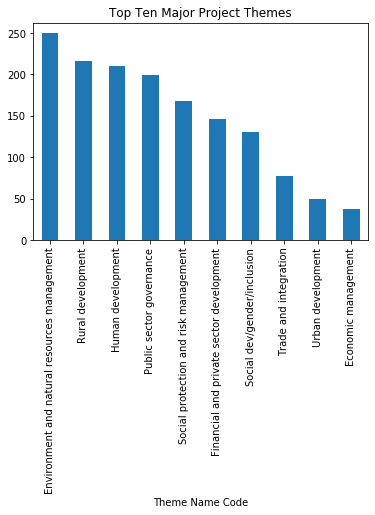

In [40]:
print(new_df['name'].value_counts()[:10])
new_df['name'].value_counts()[:10].plot(kind = 'bar',title = 'Top Ten Major Project Themes')
plt.xlabel('Theme Name Code')